# Persian Digit Recognizer
we will use MLP for recognizing Persian Digits from HodaDataset. 

In [10]:
from HodaDatasetReader import read_hoda_dataset
train_images, train_labels = read_hoda_dataset('./DigitDB/Train 60000.cdb', reshape=False)
test_images, test_labels = read_hoda_dataset('./DigitDB/Test 20000.cdb', reshape=False)

# Showing one sample of test and train sets
we show some images from test sets and train sets

## Examples from train set

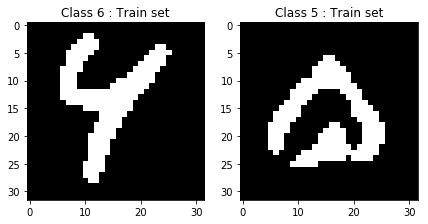

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,9)

for i in range(2):
    plt.subplot(2,2,i+1)
    plt.imshow(train_images[i][:,:,0], cmap='gray', interpolation='none')
    plt.title("Class {} : Train set".format(int(train_labels[i])))

## Examples from test set

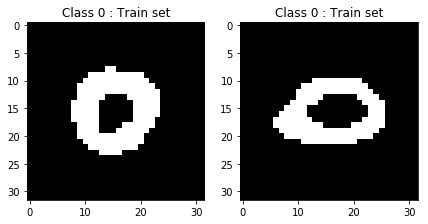

In [20]:
for i in range(2):
    plt.subplot(2,2,i+1)
    plt.imshow(test_images[i][:,:,0], cmap='gray', interpolation='none')
    plt.title("Class {} : Train set".format(int(test_labels[i])))

# MLP model using Keras
we use keras to design a MLP for learning this dataset on it. first we load and preprocess data again

In [21]:
from keras.utils import to_categorical
train_images, train_labels = read_hoda_dataset('./DigitDB/Train 60000.cdb')
test_images, test_labels = read_hoda_dataset('./DigitDB/Test 20000.cdb')
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Using TensorFlow backend.


## Model design
model structure will be somthing like the model below:

In [32]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout

model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(32 * 32,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Training the network
**then we can fit the model on network with train set. we will do this in 10 epochs and validation split of 0.2**

In [29]:
history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 8s 170us/step - loss: 0.0021 - acc: 0.9995 - val_loss: 0.0449 - val_acc: 0.9934
Epoch 2/20
48000/48000 [==============================] - 8s 168us/step - loss: 0.0017 - acc: 0.9996 - val_loss: 0.0492 - val_acc: 0.9931
Epoch 3/20
48000/48000 [==============================] - 8s 161us/step - loss: 0.0016 - acc: 0.9998 - val_loss: 0.0581 - val_acc: 0.9915
Epoch 4/20
48000/48000 [==============================] - 8s 159us/step - loss: 0.0018 - acc: 0.9997 - val_loss: 0.0776 - val_acc: 0.9892
Epoch 5/20
48000/48000 [==============================] - 9s 178us/step - loss: 0.0015 - acc: 0.9998 - val_loss: 0.0647 - val_acc: 0.9915
Epoch 6/20
48000/48000 [==============================] - 9s 179us/step - loss: 0.0016 - acc: 0.9997 - val_loss: 0.0626 - val_acc: 0.9916
Epoch 7/20
48000/48000 [==============================] - 10s 204us/step - loss: 0.0014 - acc: 0.9998 - val_loss: 0.0716 -

## Error Plot
now we can plot the error on train set and validation set

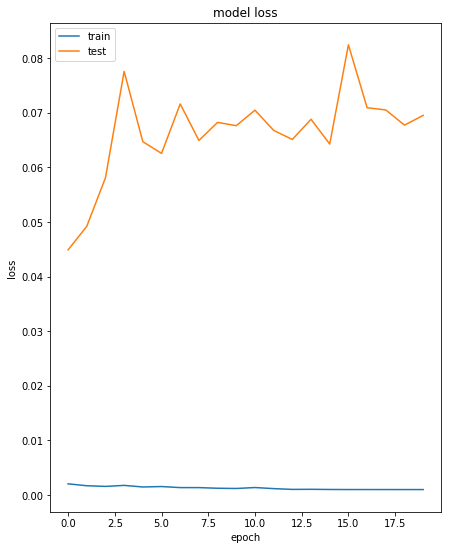

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Measuring Metric 
we can use `sklearn` to compute **Precision**, **Recall** and **F1 score**
precision ,recall and F1 score metrics are printed in a table after running code below 

In [51]:
from sklearn.metrics import classification_report

predicted = model.predict(test_images, verbose=0)
predicted_classes = model.predict_classes(test_images, verbose=0)

# reduce to 1D array
predicted = np.argmax(predicted, axis=1)
        
report = classification_report(np.argmax(test_labels, axis=1), predicted)
print(report)

              precision    recall  f1-score   support

           0       0.16      0.00      0.01      2000
           1       0.05      0.00      0.00      2000
           2       0.09      0.58      0.15      2000
           3       0.24      0.08      0.12      2000
           4       0.13      0.18      0.15      2000
           5       0.14      0.02      0.03      2000
           6       0.07      0.02      0.03      2000
           7       0.04      0.01      0.02      2000
           8       0.07      0.05      0.06      2000
           9       0.00      0.00      0.00      2000

   micro avg       0.10      0.10      0.10     20000
   macro avg       0.10      0.10      0.06     20000
weighted avg       0.10      0.10      0.06     20000



# Dropout
adding a dropout layer help the network to avoid overfitting by ignoring some weights and nodes in each iteration. we add a dropout layer of value 0.2 and compare the results.

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 11s 228us/step - loss: 0.2520 - acc: 0.9294 - val_loss: 0.1022 - val_acc: 0.9730
Epoch 2/20
48000/48000 [==============================] - 9s 193us/step - loss: 0.1106 - acc: 0.9706 - val_loss: 0.0896 - val_acc: 0.9770
Epoch 3/20
48000/48000 [==============================] - 10s 207us/step - loss: 0.0861 - acc: 0.9773 - val_loss: 0.0880 - val_acc: 0.9796
Epoch 4/20
48000/48000 [==============================] - 9s 188us/step - loss: 0.0742 - acc: 0.9808 - val_loss: 0.1010 - val_acc: 0.9776
Epoch 5/20
48000/48000 [==============================] - 10s 200us/step - loss: 0.0663 - acc: 0.9831 - val_loss: 0.0904 - val_acc: 0.9825
Epoch 6/20
48000/48000 [==============================] - 10s 212us/step - loss: 0.0588 - acc: 0.9851 - val_loss: 0.0921 - val_acc: 0.9827
Epoch 7/20
48000/48000 [==============================] - 10s 199us/step - loss: 0.0569 - acc: 0.9868 - val_loss: 0.09

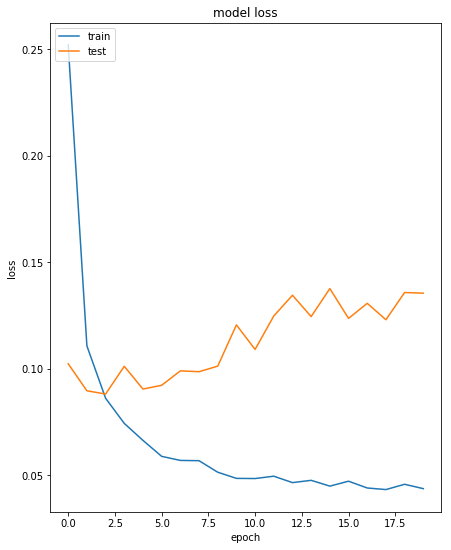

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2000
           1       0.97      0.99      0.98      2000
           2       0.94      0.95      0.95      2000
           3       0.95      0.93      0.94      2000
           4       0.94      0.95      0.95      2000
           5       0.97      0.98      0.97      2000
           6       0.96      0.96      0.96      2000
           7       0.99      0.97      0.98      2000
           8       0.99      0.97      0.98      2000
           9       0.95      0.97      0.96      2000

   micro avg       0.97      0.97      0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



In [53]:
model2 = Sequential()
model2.add(Dense(50, activation='relu', input_shape=(32 * 32,)))
model2.add(Dense(30, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(train_images, train_labels, epochs=20, validation_split=0.2)

# plot results
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# metrics
predicted2 = model2.predict(test_images, verbose=0)
predicted_classes2 = model.predict_classes(test_images, verbose=0)

# reduce to 1D array
predicted2 = np.argmax(predicted2, axis=1)
        
report = classification_report(np.argmax(test_labels, axis=1), predicted2)
print(report)

as we can see, loss is a bit higher but metrics are very higher than the other one

# Validation Set

validation set is a part of train set that network **doesn't see and learn them**. they are just for knowing the error for each epoch for the designer and test network during training. all examples before were computed with 0.2 split for validation set. in means 0.2 of data was dedicated for validation test . all orange lines in plots are loss for validation sets .

# Batch Size
batch size is related to learning phase for the network. it means that network batches some input data and changes the weights of the network after computing them all . e.g if batch size is 5 in this example, the model batches 5 picture, computes changes for each of them and applies the merge of computations after all computations for 5 images done. and it goes to next batch to learn all data. the speed of learning with batch size will increase but it may affect on accuracy of model.

we use **batch size of 100** for this example and compare the results with previous models.

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 128us/step - loss: 0.2919 - acc: 0.9175 - val_loss: 0.1152 - val_acc: 0.9665
Epoch 2/20
48000/48000 [==============================] - 4s 91us/step - loss: 0.1209 - acc: 0.9666 - val_loss: 0.0925 - val_acc: 0.9744
Epoch 3/20
48000/48000 [==============================] - 5s 103us/step - loss: 0.0889 - acc: 0.9761 - val_loss: 0.0735 - val_acc: 0.9790
Epoch 4/20
48000/48000 [==============================] - 5s 96us/step - loss: 0.0727 - acc: 0.9794 - val_loss: 0.0729 - val_acc: 0.9808
Epoch 5/20
48000/48000 [==============================] - 5s 97us/step - loss: 0.0602 - acc: 0.9827 - val_loss: 0.0697 - val_acc: 0.9818
Epoch 6/20
48000/48000 [==============================] - 4s 79us/step - loss: 0.0498 - acc: 0.9857 - val_loss: 0.0691 - val_acc: 0.9828
Epoch 7/20
48000/48000 [==============================] - 4s 87us/step - loss: 0.0417 - acc: 0.9879 - val_loss: 0.0669 - val_a

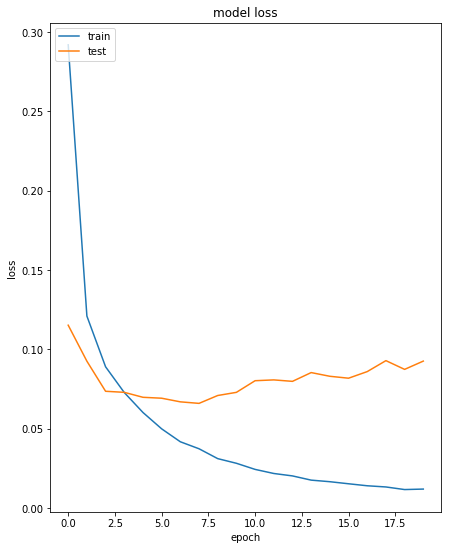

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2000
           1       0.97      0.99      0.98      2000
           2       0.94      0.96      0.95      2000
           3       0.94      0.94      0.94      2000
           4       0.96      0.95      0.95      2000
           5       0.97      0.98      0.98      2000
           6       0.98      0.96      0.97      2000
           7       0.99      0.98      0.99      2000
           8       0.99      0.97      0.98      2000
           9       0.97      0.97      0.97      2000

   micro avg       0.97      0.97      0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



In [54]:
model3 = Sequential()
model3.add(Dense(50, activation='relu', input_shape=(32 * 32,)))
model3.add(Dense(30, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(10, activation='softmax'))
model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(train_images, train_labels, epochs=20, validation_split=0.2, batch_size=100)

# plot results
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# metrics
predicted3 = model3.predict(test_images, verbose=0)
predicted_classes3 = model.predict_classes(test_images, verbose=0)

# reduce to 1D array
predicted3 = np.argmax(predicted3, axis=1)
        
report = classification_report(np.argmax(test_labels, axis=1), predicted3)
print(report)

there is almost no difference with running the model with Dropout and Validation set. but it caused the network to learn faster. so sometimes it is better to use batch size for learning a network